# <center><font color='blue'>Data 296</font></center>
# <center><font color='blue'>Class 6: Probability Distributions in Python</font></center>

### <font color='blue'>Much of the material in this brief introduction to probability distributions is contained in the tutorial below.</font>
### <center>[https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html](Probability Distributions Tutorial)</center>

Illustrating the Poisson distribution.

In [2]:
# This code retrieves all the continuous distributions supported by scipy.stats
dist_contin = [d for d in dir(stats) if
                 isinstance(getattr(stats, d), stats.rv_continuous)]
dist_contin

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'recipinvgauss',
 'reciprocal',

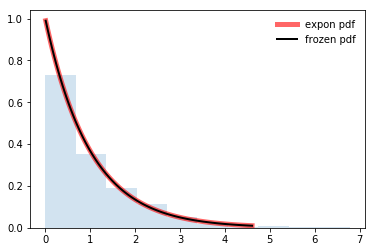

In [3]:
# Plot the exponential distribution and draw a random sample
from scipy.stats import expon
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = expon.stats(moments='mvsk')

x = np.linspace(expon.ppf(0.01),expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),'r-', lw=5, alpha=0.6, label='expon pdf')
rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))
r = expon.rvs(size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

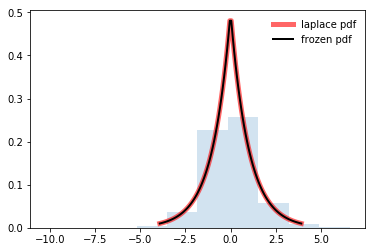

In [4]:
# Plot the Laplace (double exponential) distribution and draw a random sample
from scipy.stats import laplace
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:
mean, var, skew, kurt = laplace.stats(moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(laplace.ppf(0.01),laplace.ppf(0.99), 100)
ax.plot(x, laplace.pdf(x),'r-', lw=5, alpha=0.6, label='laplace pdf')

# Alternatively, the distribution object can be called (as a function) 
# to fix the shape, location and scale parameters. This 
# returns a “frozen” RV object holding the given parameters fixed.

# Freeze the distribution and display the frozen pdf:
rv = laplace()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:
vals = laplace.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], laplace.cdf(vals))

# Generate random numbers:
r = laplace.rvs(size=1000)
# And compare the histogram:
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

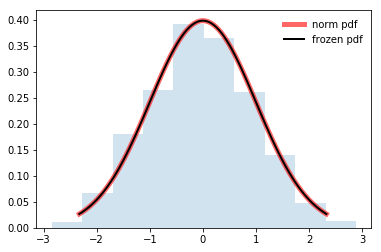

In [5]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
# Calculate a few first moments:

mean, var, skew, kurt = norm.stats(moments='mvsk')
#Display the probability density function (pdf):

x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

# Alternatively, the distribution object can be called (as a function) 
# to fix the shape, location and scale parameters. This #returns a 
# “frozen” RV object holding the given parameters fixed.

#Freeze the distribution and display the frozen pdf:

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

# Check accuracy of cdf and ppf:

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))
#True

#Generate random numbers:
r = norm.rvs(size=1000)
#And compare the histogram:

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [6]:
# In this and the next 3 cells, assume that the random variable X ~ N(40,5).
# Calculate the probability P[X <= 38]
rv40 = stats.norm(loc=40,scale=5)
rv40.cdf(38)

0.3445782583896758

In [7]:
# Find Q1, Q2 and Q3 where Q1 = Q(0.25), Q2 = Q(0.5) (median), Q3 = Q(0.75).
[round(rv40.ppf(0.25),2),round(rv40.ppf(0.50),2),round(rv40.ppf(0.75),2)]

[36.63, 40.0, 43.37]

In [8]:
# Find the probability P[30 <= X <= 45]
print(f'P[30 <= X <= 45] (using cdf) is ',(rv40.cdf(45) - rv40.cdf(30)))
print(f'P[30 <= X <= 45] (using sf)  is ',(rv40.sf(30) - rv40.sf(45)))

P[30 <= X <= 45] (using cdf) is  0.8185946141203637
P[30 <= X <= 45] (using sf)  is  0.8185946141203637


In [9]:
#mean, var, skew, kurt = rv40.stats(s, moments='mvsk')
rv40.stats(moments='mvsk')

(array(40.), array(25.), array(0.), array(0.))

In [10]:
# Calculate first four central moments of sample rs40_rs1000
rv40_rs1000 = rv40.rvs(size=1000)
np.round(stats.moment(rv40_rs1000, [1,2,3,4]),4)

array([   0.    ,   25.7398,   13.7312, 2051.1171])

In [11]:
# Calculate sample skewness & kurtosis
[stats.skew(rv40_rs1000),stats.kurtosis(rv40_rs1000)]

[0.10514783769333434, 0.09585740549455624]

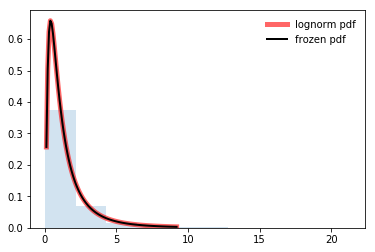

In [12]:
# Plot a lognormal distrir
from scipy.stats import lognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# Calculate a few first moments:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

# Display the probability density function (pdf):
x = np.linspace(lognorm.ppf(0.01, s),lognorm.ppf(0.99, s), 100)
ax.plot(x, lognorm.pdf(x, s),'r-', lw=5, alpha=0.6, label='lognorm pdf')

# Alternatively, the distribution object can be called (as a function) 
# to fix the shape, location and scale parameters. This returns a “frozen” 
# RV object holding the given parameters fixed.

#Freeze the distribution and display the frozen pdf:
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Check accuracy of cdf and ppf:
vals = lognorm.ppf([0.001, 0.5, 0.999], s)
np.allclose([0.001, 0.5, 0.999], lognorm.cdf(vals, s))

# Generate random numbers:
r = lognorm.rvs(s, size=1000)
# And compare the histogram:

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

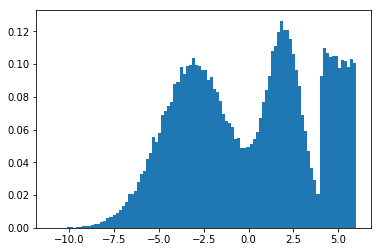

In [14]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]
coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 100000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])
random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
plt.hist(sample, bins=100, density=True)
plt.show()